In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

In [3]:
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(x.shape[0]) * 0.3

In [4]:
x.shape, y.shape

((120,), (120,))

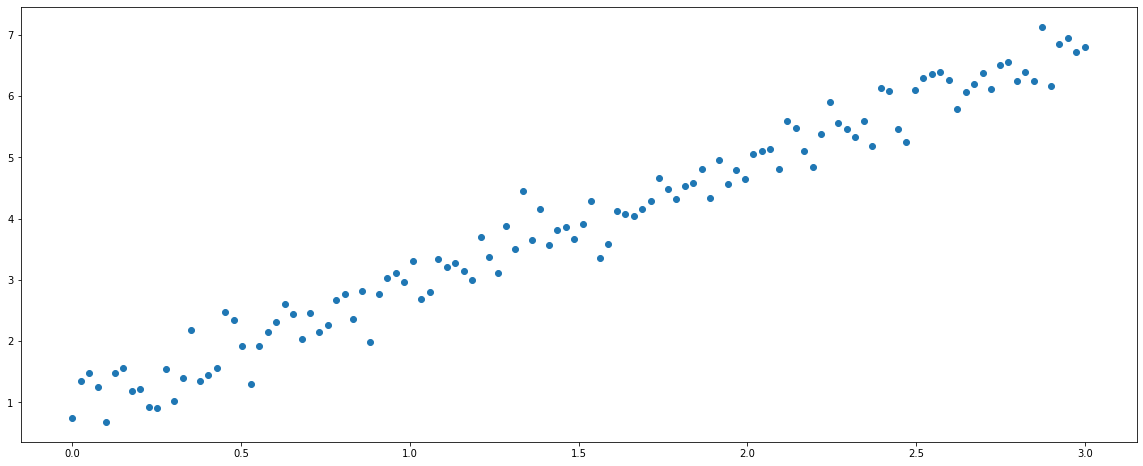

In [5]:
fig = plt.figure(figsize=(20,8))
plt.scatter(x,y)

In [6]:
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

In [7]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

In [8]:
def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))
    
    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [9]:
linear_model = LinearModel()
Weights, Biases = [], []
epochs = 100

for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy())
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.12)
    print(f'Epoch Count: {epoch_count}, Loss Value: {real_loss.numpy()}')

Epoch Count: 0, Loss Value: 666.8778686523438
Epoch Count: 1, Loss Value: 10.380118370056152
Epoch Count: 2, Loss Value: 5.126260757446289
Epoch Count: 3, Loss Value: 4.623523235321045
Epoch Count: 4, Loss Value: 4.198652267456055
Epoch Count: 5, Loss Value: 3.8138160705566406
Epoch Count: 6, Loss Value: 3.465043306350708
Epoch Count: 7, Loss Value: 3.1489522457122803
Epoch Count: 8, Loss Value: 2.8624813556671143
Epoch Count: 9, Loss Value: 2.6028549671173096
Epoch Count: 10, Loss Value: 2.3675572872161865
Epoch Count: 11, Loss Value: 2.154308319091797
Epoch Count: 12, Loss Value: 1.9610425233840942
Epoch Count: 13, Loss Value: 1.7858868837356567
Epoch Count: 14, Loss Value: 1.627144455909729
Epoch Count: 15, Loss Value: 1.483277440071106
Epoch Count: 16, Loss Value: 1.352891445159912
Epoch Count: 17, Loss Value: 1.2347235679626465
Epoch Count: 18, Loss Value: 1.1276288032531738
Epoch Count: 19, Loss Value: 1.0305695533752441
Epoch Count: 20, Loss Value: 0.9426052570343018
Epoch Count

In [10]:
m_pred, c_pred = linear_model.Weight.numpy(), linear_model.Bias.numpy()

In [11]:
y_pred = m_pred*x + c_pred

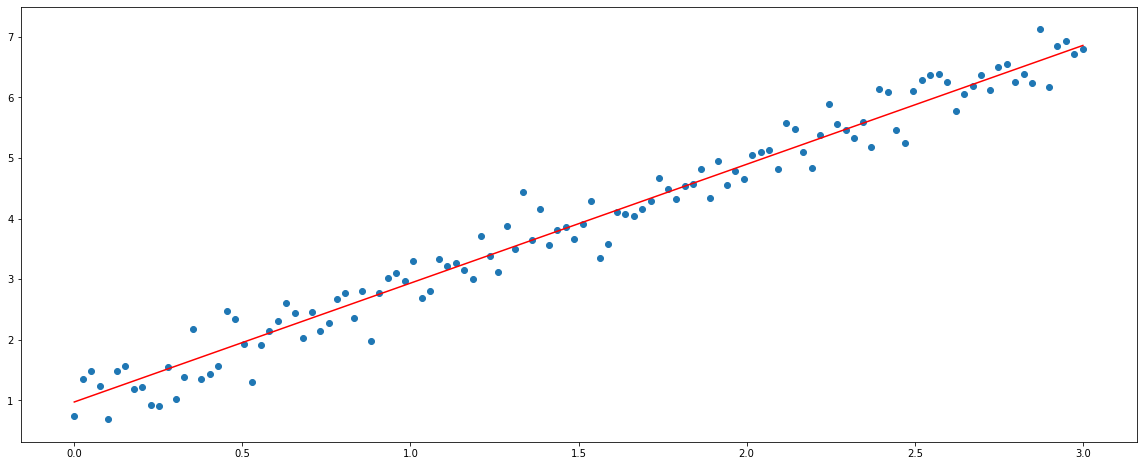

In [12]:
fig = plt.figure(figsize=(20,8))
plt.plot(x, y_pred, 'r')
plt.scatter(x,y)